Import Liberie e import dataset 

In [115]:
import pandas as pd
import numpy as np
import os
    

In [116]:
dati_ambientali = pd.read_csv('nuovoETSDBv38.csv',sep =";")
# guardo la coda 
dati_ambientali.tail()

,country,country_code,ETS information,main activity sector name,unit,value,year
57389,Hungary,HU,2. Verified emissions,10 Aviation,tonne of CO2 equ.,12599748.0,Total 3rd trading period (13-20)
57390,Hungary,HU,1.1.3 Free allocation for modernisation of ele...,23 Metal ore roasting or sintering,tonne of CO2 equ.,0.0,Total 3rd trading period (13-20)
57391,Hungary,HU,1.1.3 Free allocation for modernisation of ele...,"30 Production of lime, or calcination of dolom...",tonne of CO2 equ.,0.0,Total 3rd trading period (13-20)
57392,Hungary,HU,4. Total surrendered units,43 Production of hydrogen and synthesis gas,tonne of CO2 equ.,883972.0,Total 3rd trading period (13-20)
57393,Ireland,IE,1.1.3 Free allocation for modernisation of ele...,10 Aviation,tonne of CO2 equ.,0.0,Total 3rd trading period (13-20)


Basic Structure of DataFrame

In [117]:
dati_ambientali.info()
#inzio ad inoltrarmi nel DataFrame per riconoscere qualche quali colonne ci sono, di che tipo sono e in che quantità

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    57394 non-null  object 
 1   country_code               57394 non-null  object 
 2   ETS information            57394 non-null  object 
 3   main activity sector name  57394 non-null  object 
 4   unit                       57394 non-null  object 
 5   value                      57238 non-null  float64
 6   year                       57394 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


,country,country_code,ETS information,main activity sector name,unit,value,year
0,Belgium,BE,2. Verified emissions,35 Production of pulp,tonne of CO2 equ.,102581.0,2009
1,Belgium,BE,2. Verified emissions,35 Production of pulp,tonne of CO2 equ.,106671.0,2011
2,Belgium,BE,2. Verified emissions,35 Production of pulp,tonne of CO2 equ.,126702.0,2012
3,Belgium,BE,4. Total surrendered units,35 Production of pulp,tonne of CO2 equ.,98349.0,2007
4,Belgium,BE,4. Total surrendered units,35 Production of pulp,tonne of CO2 equ.,96708.0,2008
5,Belgium,BE,4. Total surrendered units,35 Production of pulp,tonne of CO2 equ.,124944.0,2016
6,Belgium,BE,4. Total surrendered units,35 Production of pulp,tonne of CO2 equ.,127631.0,2019
7,Belgium,BE,4.1 Surrendered EU allowances (EUAs and EUAAs),35 Production of pulp,tonne of CO2 equ.,87671.0,2011
8,Belgium,BE,4.1 Surrendered EU allowances (EUAs and EUAAs),35 Production of pulp,tonne of CO2 equ.,126702.0,2012
9,Belgium,BE,4.3 Surrendered emission reduction units (ERUs),35 Production of pulp,tonne of CO2 equ.,0.0,2006


In [ ]:
#dalla tail precedente mi sono accorto che ho degli intervalli di anni.
#elimino  i periodi che sono soltanto una somma di tutti gli anni presenti nell'intervallo.

df = df.drop(df[df.year == 'Total 1st trading period (05-07)'].index)
df = df.drop(df[df.year == 'Total 2nd trading period (08-12)'].index)
df = df.drop(df[df.year == 'Total 3rd trading period (13-20)'].index)

#trasformo l'anno in un intero 

df['year'].astype(str).astype(int)


In [185]:
#selezione per ispezionare meglio i dati 
dati_ambientali[['country','main activity sector name','value']]
#nella tabella sono presenti quindi il paese , il modo in cui viene prodotta la CO2 e quante tonnellate in quel settore vengono registrate.

,country,main activity sector name,value
0,Belgium,35 Production of pulp,102581.0
1,Belgium,35 Production of pulp,106671.0
2,Belgium,35 Production of pulp,126702.0
3,Belgium,35 Production of pulp,98349.0
4,Belgium,35 Production of pulp,96708.0
...,...,...,...
57389,Hungary,10 Aviation,12599748.0
57390,Hungary,23 Metal ore roasting or sintering,0.0
57391,Hungary,"30 Production of lime, or calcination of dolom...",0.0
57392,Hungary,43 Production of hydrogen and synthesis gas,883972.0


In [130]:
#filtraggio
df = dati_ambientali

dati_belgio = df.loc[((df.country == 'Belgium') & (df.value > 900000))]
dati_belgio.info()
dati_belgio.head(10)

#un pò di informazioni sulla tabella ricavata dal filtraggio  dove il paese è il Belgio e il valore delle tonnellate di CO2 supera le 900000 tonnellate

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 10 to 55647
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    685 non-null    object 
 1   country_code               685 non-null    object 
 2   ETS information            685 non-null    object 
 3   main activity sector name  685 non-null    object 
 4   unit                       685 non-null    object 
 5   value                      685 non-null    float64
 6   year                       685 non-null    object 
dtypes: float64(1), object(6)
memory usage: 42.8+ KB


,country,country_code,ETS information,main activity sector name,unit,value,year
10,Belgium,BE,1.1 Freely allocated allowances,36 Production of paper or cardboard,tonne of CO2 equ.,967934.0,2007
343,Belgium,BE,2. Verified emissions,31 Manufacture of glass,tonne of CO2 equ.,1201123.0,2008
345,Belgium,BE,4. Total surrendered units,31 Manufacture of glass,tonne of CO2 equ.,1081336.0,2010
348,Belgium,BE,4.1 Surrendered EU allowances (EUAs and EUAAs),31 Manufacture of glass,tonne of CO2 equ.,955132.0,2009
349,Belgium,BE,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,918195.0,2010
383,Belgium,BE,1.1 Freely allocated allowances,42 Production of bulk chemicals,tonne of CO2 equ.,3884802.0,2005
384,Belgium,BE,1.1.1 Free allocation to existing entities (Ar...,42 Production of bulk chemicals,tonne of CO2 equ.,3939820.0,2007
385,Belgium,BE,1.1.1 Free allocation to existing entities (Ar...,42 Production of bulk chemicals,tonne of CO2 equ.,6917571.0,2008
389,Belgium,BE,1.1 Freely allocated allowances,42 Production of bulk chemicals,tonne of CO2 equ.,3939820.0,2007
390,Belgium,BE,1.1 Freely allocated allowances,42 Production of bulk chemicals,tonne of CO2 equ.,6917571.0,2008


In [175]:
# tutte i valori di value sono tutti in Tonnellate di CO2
df_new.unit.value_counts()

tonne of CO2 equ.    47583
Name: unit, dtype: int64

STATISTICHE NUMERICHE :
Media / Mediana / diffusione e disperisione dati / 
Range / Percentile /Varianza


In [131]:
df.describe()
#ci dà una descrizione veloce del dataFrame con le varie statisticeh riassuntive

,value
count,4.745800e+04
mean,6.280768e+12
std,6.812359e+14
min,-2.924860e+16
25%,0.000000e+00
50%,1.318410e+05
75%,1.671265e+06
max,5.235000e+16


In [132]:
print("la media è : {0} ".format(df.value.mean()))
print("la mediaana è : {0} ".format(df.value.median()))


la media è : 6280768370172.774 
la mediaana è : 131841.0 


In [133]:
print("Il range è : {0} ".format(df.value.max() - df.value.min()))
print("25 percentile : {0} ".format(df.value.quantile(.25)))
print("50 percentile : {0} ".format(df.value.quantile(.50)))
print("75 percentile : {0} ".format(df.value.quantile(.75)))
print("La deviazione standard è : {0} ".format(df.value.std()))
print("La varianza è : {0} ".format(df.value.var()))




Il range è : 8.15985972430267e+16 
25 percentile : 0.0 
50 percentile : 131841.0 
75 percentile : 1671265.25 
La deviazione standard è : 681235874588927.5 
La varianza è : 4.64082316826941e+29 


Visualizzazione delle statistiche.

<AxesSubplot:>

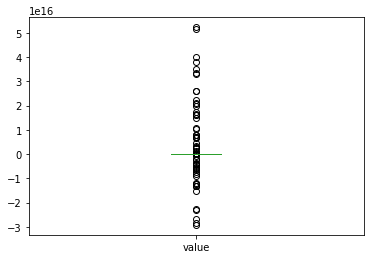

In [135]:
df.value.plot(kind='box')

STATISTICHEPER LE CATEGORIE: 


In [136]:
df.describe(include = 'all')
# count conteggio, unique conteggio unico ,top la maggior parte di quello che è stato usato,

,country,country_code,ETS information,main activity sector name,unit,value,year
count,47583,47583,47583,47583,47583,4.745800e+04,47583
unique,32,32,13,31,1,NaN,15
top,Germany,DE,2. Verified emissions,20-99 All stationary installations,tonne of CO2 equ.,NaN,2012
freq,2614,2614,6495,4439,47583,NaN,3477
mean,NaN,NaN,NaN,NaN,NaN,6.280768e+12,NaN
std,NaN,NaN,NaN,NaN,NaN,6.812359e+14,NaN
min,NaN,NaN,NaN,NaN,NaN,-2.924860e+16,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.318410e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.671265e+06,NaN


In [137]:
#df["ETS information"].value_counts()

#oppure per la proporzione eseguire 

df["ETS information"].value_counts(normalize=True)

df['year'].value_counts(normalize=True)

2012    0.073072
2009    0.070761
2008    0.070698
2010    0.070655
2011    0.070613
2007    0.066347
2016    0.065317
2014    0.065023
2019    0.064960
2015    0.064939
2018    0.064708
2017    0.064666
2013    0.064645
2006    0.061913
2005    0.061682
Name: year, dtype: float64

<AxesSubplot:title={'center':'Utilizzo classi ETS information'}>

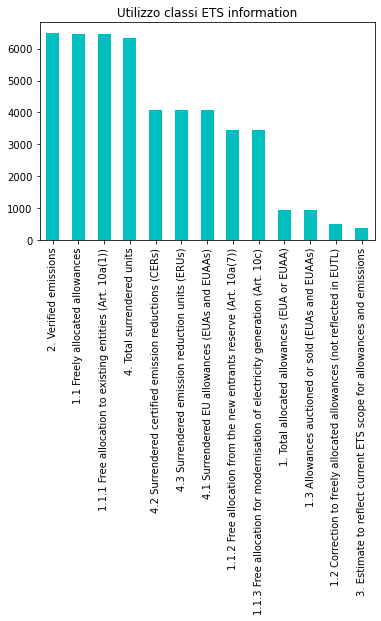

In [138]:
df["ETS information"].value_counts().plot(kind='bar',title='Utilizzo classi ETS information',color = 'c')

RAGGRUPPAMENTO : 
    HIST / 
    KDE / 
    SCATTER PLOT / 

<AxesSubplot:title={'center':'Istogramma per gli anni'}, ylabel='Frequency'>

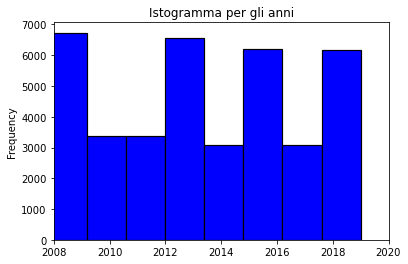

In [252]:
df.year.plot(kind='hist',title="Istogramma per gli anni", color = "b",xlim=[2008,2020],edgecolor='black',linewidth=1.2)

#df.value.plot(kind='hist',title="Istogramma per i valori", color = "b",xlim = [-10000000000000000,10000000000000000],edgecolor='black',linewidth=1.2)


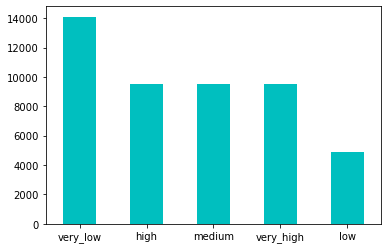

In [140]:
new_df = pd.qcut(df.value, 5 , labels=['very_low','low','medium','high','very_high']).value_counts().plot(kind='bar',color='c',rot = 0);
#ho discretizzato per avere un idea migliore  

#insomma la fascia in cui ci sono più valori è 'very_low' forse perchè c'è una grande presenza di 0 e quindi di valori esterni

<AxesSubplot:title={'center':'scatter plot valore paesi'}, xlabel='value', ylabel='ETS information'>

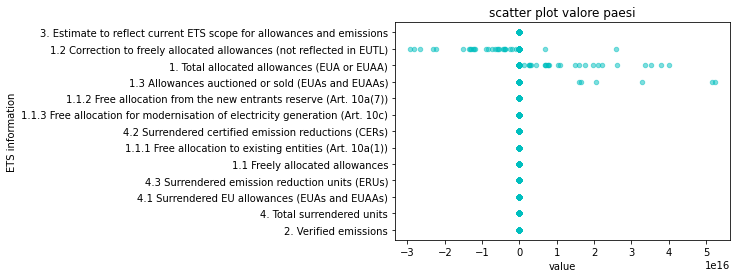

In [141]:
df.plot.scatter(x="value",y="ETS information",color = "c",title="scatter plot valore paesi",alpha=0.5)

RAGGRUPPAMENTO O AGGREGAZIONE
    

In [142]:
df.groupby(['country'])['value'].mean()

country
Austria            -2.990992e+12
Belgium             1.039851e+13
Bulgaria            1.284934e+13
Croatia             7.176343e+05
Cyprus              1.413686e+12
Czechia             6.415754e+06
Denmark            -1.433938e+13
Estonia             9.780887e+12
Finland            -2.771018e+12
France             -2.138940e+12
Germany            -5.067795e+12
Greece             -1.244448e+13
Hungary            -5.805978e+11
Iceland            -3.342767e+12
Ireland             1.006826e+12
Italy               1.017243e+13
Latvia              1.014543e+13
Liechtenstein       3.495664e+03
Lithuania           1.120402e+06
Luxembourg          4.925913e+05
Malta               1.580080e+13
NER 300 auctions    2.000000e+07
Netherlands         6.193728e+13
Norway             -3.873974e+12
Poland             -7.013688e+11
Portugal           -3.513124e+12
Romania             2.713356e+13
Slovakia            2.760888e+06
Slovenia            4.390875e+11
Spain               3.310840e+13
Sw

CROSS TAB / PIVOTING

In [143]:
pd.crosstab(df["ETS information"],df["country"])

country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Netherlands,Norway,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,United Kingdom
ETS information,,,,,,,,,,,,,,,,,,,,,
1. Total allocated allowances (EUA or EUAA),30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
1.1 Freely allocated allowances,255,276,202,87,83,262,168,170,273,299,...,259,192,274,215,238,241,214,341,283,311
1.1.1 Free allocation to existing entities (Art. 10a(1)),255,276,202,87,80,262,168,170,273,299,...,259,192,274,215,238,241,214,341,283,311
1.1.2 Free allocation from the new entrants reserve (Art. 10a(7)),140,132,126,86,42,133,63,84,147,154,...,133,126,154,119,129,126,98,175,154,161
1.1.3 Free allocation for modernisation of electricity generation (Art. 10c),140,132,126,86,42,133,63,84,147,154,...,133,126,154,119,129,126,98,175,154,161
1.2 Correction to freely allocated allowances (not reflected in EUTL),16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
1.3 Allowances auctioned or sold (EUAs and EUAAs),30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
2. Verified emissions,263,276,216,87,83,261,177,171,273,299,...,260,192,274,213,238,235,208,339,288,315
3. Estimate to reflect current ETS scope for allowances and emissions,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


<AxesSubplot:xlabel='ETS information'>

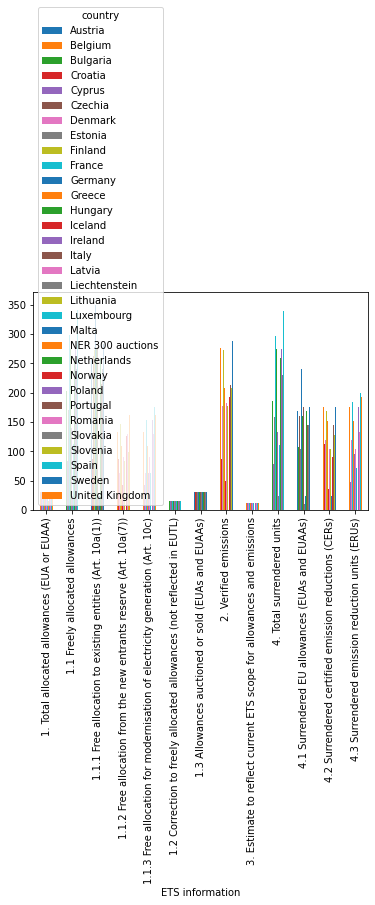

In [144]:
pd.crosstab(df["ETS information"],df["country"]).plot(kind="bar")

In [145]:
# tabella pivot 
df.pivot_table(index='country', columns='ETS information', values='value',aggfunc='median')

ETS information,1. Total allocated allowances (EUA or EUAA),1.1 Freely allocated allowances,1.1.1 Free allocation to existing entities (Art. 10a(1)),1.1.2 Free allocation from the new entrants reserve (Art. 10a(7)),1.1.3 Free allocation for modernisation of electricity generation (Art. 10c),1.2 Correction to freely allocated allowances (not reflected in EUTL),1.3 Allowances auctioned or sold (EUAs and EUAAs),2. Verified emissions,3. Estimate to reflect current ETS scope for allowances and emissions,4. Total surrendered units,4.1 Surrendered EU allowances (EUAs and EUAAs),4.2 Surrendered certified emission reductions (CERs),4.3 Surrendered emission reduction units (ERUs)
country,,,,,,,,,,,,,
Austria,28419190.0,985761.0,985761.0,0.0,0.0,0.0,114500.0,961580.0,2184281.5,1064301.0,380713.0,0.0,0.0
Belgium,49264020.0,917811.0,917811.0,78.0,0.0,0.0,0.0,1011821.5,4470267.0,981464.0,478425.0,0.0,0.0
Bulgaria,286766.0,335969.5,307440.5,4664.5,0.0,0.0,0.0,288626.0,1705552.5,317913.0,22820.5,0.0,0.0
Croatia,31358.5,122464.0,122464.0,0.0,0.0,0.0,0.0,174695.0,11783333.5,226998.0,0.0,0.0,0.0
Cyprus,2782401.5,1535050.0,821387.0,147705.0,0.0,0.0,0.0,1369166.0,0.0,1351026.5,1002403.5,0.0,0.0
Czechia,24544381.5,673099.0,672835.0,0.0,0.0,0.0,0.0,576948.0,3157989.0,554651.5,259436.5,0.0,0.0
Denmark,16417559.5,322780.0,318450.0,1462.0,0.0,0.0,55500.0,249772.0,0.0,561587.0,20310.0,0.0,0.0
Estonia,9040084.5,92972.5,92972.5,0.0,0.0,0.0,0.0,50059.0,0.0,69032.0,44008.5,0.0,0.0
Finland,28464577.0,539585.0,494181.0,0.0,0.0,0.0,0.0,481072.0,1672471.5,533365.0,93103.5,0.0,0.0


DATA MUNGING : LAVORARE CON I DATI MANCANTI


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47583 entries, 0 to 57281
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    47583 non-null  object 
 1   country_code               47583 non-null  object 
 2   ETS information            47583 non-null  object 
 3   main activity sector name  47583 non-null  object 
 4   unit                       47583 non-null  object 
 5   value                      47458 non-null  float64
 6   year                       47583 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.9+ MB


In [147]:
#abbiamo valore mancanti in value prima di tutto estraiamo le righe con i valori mancanti
df[df.value.isnull()]

,country,country_code,ETS information,main activity sector name,unit,value,year
4231,Sweden,SE,4. Total surrendered units,38 Production of nitric acid,tonne of CO2 equ.,NaN,2016
15233,United Kingdom,GB,3. Estimate to reflect current ETS scope for a...,20-99 All stationary installations,tonne of CO2 equ.,NaN,2013
15234,United Kingdom,GB,3. Estimate to reflect current ETS scope for a...,20-99 All stationary installations,tonne of CO2 equ.,NaN,2014
15235,United Kingdom,GB,3. Estimate to reflect current ETS scope for a...,20-99 All stationary installations,tonne of CO2 equ.,NaN,2015
15236,United Kingdom,GB,3. Estimate to reflect current ETS scope for a...,20-99 All stationary installations,tonne of CO2 equ.,NaN,2016
...,...,...,...,...,...,...,...
27350,Croatia,HR,3. Estimate to reflect current ETS scope for a...,20-99 All stationary installations,tonne of CO2 equ.,NaN,2016
27359,Cyprus,CY,3. Estimate to reflect current ETS scope for a...,20-99 All stationary installations,tonne of CO2 equ.,NaN,2013
27360,Cyprus,CY,3. Estimate to reflect current ETS scope for a...,20-99 All stationary installations,tonne of CO2 equ.,NaN,2014
27361,Cyprus,CY,3. Estimate to reflect current ETS scope for a...,20-99 All stationary installations,tonne of CO2 equ.,NaN,2015


In [148]:
df["value"].value_counts()

0.000000e+00    14040
3.889100e+04       15
1.988680e+05       15
1.943750e+05       15
7.401430e+05       15
                ...  
1.572058e+06        1
3.802703e+16        1
4.559500e+06        1
3.019170e+05        1
1.010208e+07        1
Name: value, Length: 21086, dtype: int64

In [149]:
df["value"].fillna(df['value'].mean(),inplace=True)

In [150]:
df[df['value'].isnull()]

,country,country_code,ETS information,main activity sector name,unit,value,year


In [151]:
df.info()
##abbiamo risolto il problema dei valori mancanti grazie a fillna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47583 entries, 0 to 57281
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    47583 non-null  object 
 1   country_code               47583 non-null  object 
 2   ETS information            47583 non-null  object 
 3   main activity sector name  47583 non-null  object 
 4   unit                       47583 non-null  object 
 5   value                      47583 non-null  float64
 6   year                       47583 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.9+ MB


FUTURE ENGINEERING

In [152]:
df['year'].value_counts()

2012    3477
2009    3367
2008    3364
2010    3362
2011    3360
2007    3157
2016    3108
2014    3094
2019    3091
2015    3090
2018    3079
2017    3077
2013    3076
2006    2946
2005    2935
Name: year, dtype: int64

In [154]:
df.info()

#questo è il dataset pulito dai periodi 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47583 entries, 0 to 57281
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    47583 non-null  object 
 1   country_code               47583 non-null  object 
 2   ETS information            47583 non-null  object 
 3   main activity sector name  47583 non-null  object 
 4   unit                       47583 non-null  object 
 5   value                      47583 non-null  float64
 6   year                       47583 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.9+ MB


In [159]:
df['year']=df['year'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47583 entries, 0 to 57281
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    47583 non-null  object 
 1   country_code               47583 non-null  object 
 2   ETS information            47583 non-null  object 
 3   main activity sector name  47583 non-null  object 
 4   unit                       47583 non-null  object 
 5   value                      47583 non-null  float64
 6   year                       47583 non-null  int32  
dtypes: float64(1), int32(1), object(5)
memory usage: 3.7+ MB


FEATURE ENGINEERING 

In [160]:
df['yearState'] = np.where(df['year'] >= 2011, '1','2')

In [161]:
df['yearState'].value_counts()

1    28452
2    19131
Name: yearState, dtype: int64

In [165]:
pd.crosstab(df['main activity sector name'], df['yearState'])

yearState,1,2
main activity sector name,,
10 Aviation,2171,1073
20 Combustion of fuels,1692,1167
20-99 All stationary installations,2516,1923
21 Refining of mineral oil,1280,888
21-99 All industrial installations (excl. combustion),1608,1107
22 Production of coke,356,327
23 Metal ore roasting or sintering,334,231
24 Production of pig iron or steel,1299,923
25 Production or processing of ferrous metals,1032,681


In [169]:
#creo un nuovo df con la codifica della variabile categorica ETS information 

df_new = pd.get_dummies(df,columns =['ETS information'])

ESEMPI DI VISUALIZZAZIONE

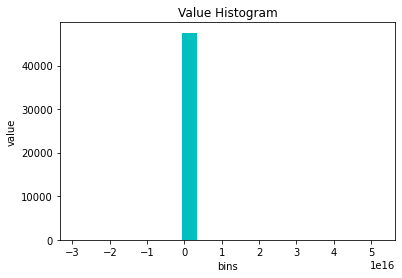

In [179]:
import matplotlib.pyplot as plt
plt.hist(df.value,bins=20,color='c')
plt.title("Value Histogram")
plt.xlabel('bins')
plt.ylabel('value')
plt.show()

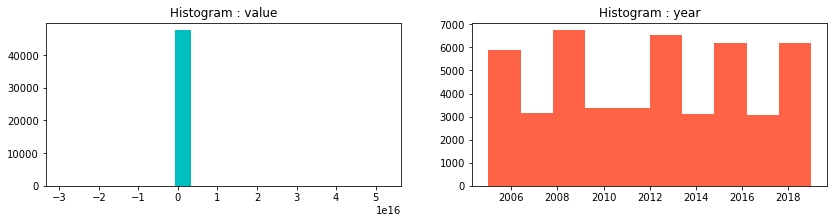

In [181]:
f,(ax1,ax2 ) = plt.subplots(1,2,figsize=(14,3))

ax1.hist(df.value,bins=20,color='c')
ax1.set_title('Histogram : value')

ax2.hist(df.year,bins=10,color='tomato')
ax2.set_title('Histogram : year')


plt.show()